<a href="https://colab.research.google.com/github/dsfdev2023/studentEvaluatiuon/blob/main/1_HENRYS_WORKFORCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

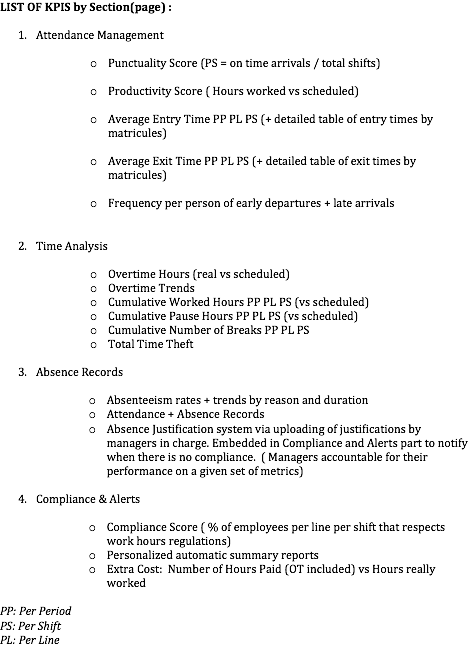



# **1.   Attendance Management**





# *   Entry Punctuality Score

# on time arrivals = within 5 minutes of shift start time



In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd

file_path = '/content/drive/MyDrive/1HENRYS WORKFORCE/DF.xlsx'  # Update with your file path
df = pd.read_excel(file_path)


/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
# Ensure 'Entree' is in time format
def convert_to_time(entry):
    if isinstance(entry, str):
        return pd.to_datetime(entry, errors='coerce').time()
    elif pd.api.types.is_datetime64_any_dtype(entry):
        return entry.time()
    return entry

df['Entree'] = df['Entree'].apply(convert_to_time)

# Define shift start times and grace period (5 minutes)
day_shift_start = pd.to_datetime('07:00').time()
night_shift_start = pd.to_datetime('19:00').time()
grace_period = pd.Timedelta(minutes=5)

# Function to check punctuality
def is_punctual(row):
    shift_start = day_shift_start if row['Shift'] == 'Jour' else night_shift_start
    allowed_entry_time = (pd.Timestamp.combine(pd.to_datetime('today'), shift_start) + grace_period).time()
    return row['Entree'] <= allowed_entry_time

# Apply the function
df['Punctual'] = df.apply(is_punctual, axis=1)

# Calculate punctuality score by shift and by 'Ligne'
punctuality_score_by_shift = df.groupby('Shift')['Punctual'].mean() * 100
punctuality_score_by_shift_and_ligne = df.groupby(['Shift', 'Ligne'])['Punctual'].mean() * 100

# Format as percentage string
punctuality_score_by_shift_percentage = punctuality_score_by_shift.apply(lambda x: f'{x:.2f}%')
punctuality_score_by_shift_and_ligne_percentage = punctuality_score_by_shift_and_ligne.apply(lambda x: f'{x:.2f}%')

# Print the punctuality score
print("Punctuality Score by Shift:")
print(punctuality_score_by_shift_percentage)
print("\nPunctuality Score by Shift and Ligne:")
print(punctuality_score_by_shift_and_ligne_percentage)


Punctuality Score by Shift:
Shift
Jour    95.30%
Nuit    95.69%
Name: Punctual, dtype: object

Punctuality Score by Shift and Ligne:
Shift  Ligne 
Jour   BAKER      92.59%
       CIGARE     96.67%
       MEINCK    100.00%
       MH        100.00%
       PATYS      95.24%
       VRD        85.71%
Nuit   BAKER      90.48%
       CIGARE    100.00%
       MEINCK    100.00%
       MH         96.77%
       PATYS      90.00%
       VRD       100.00%
Name: Punctual, dtype: object


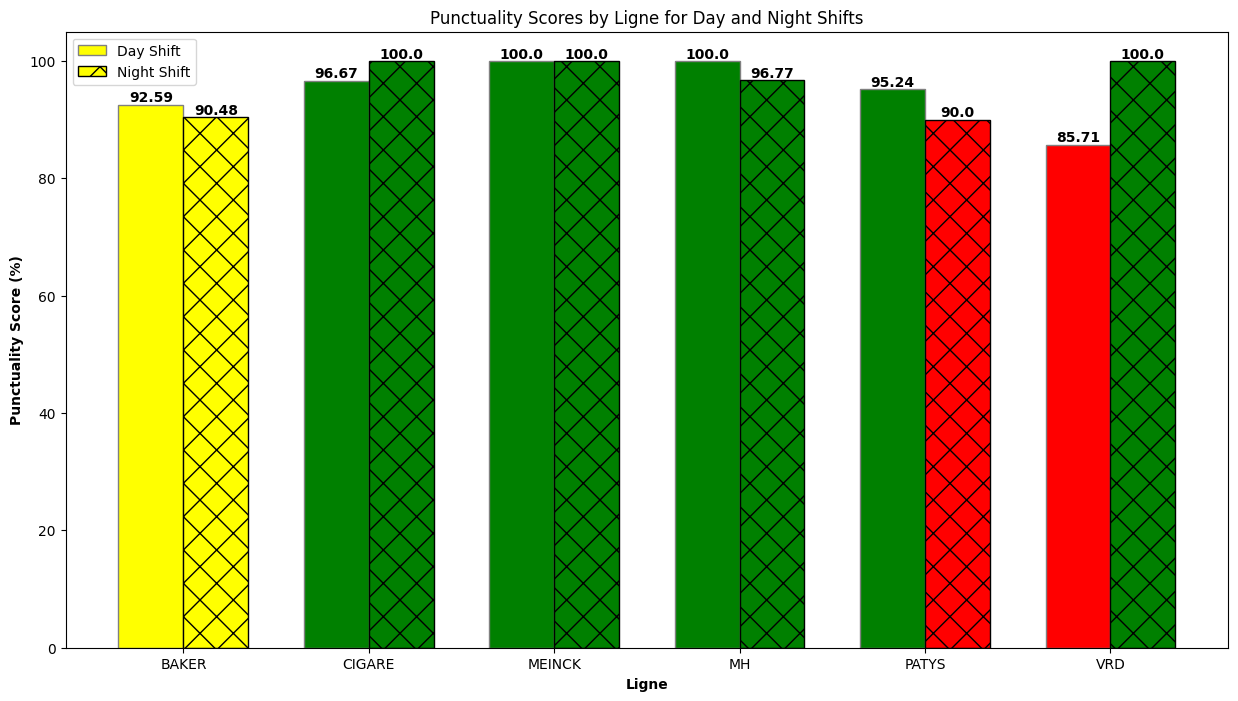

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame after processing the punctuality data

# Calculate punctuality score by shift and by 'Ligne'
punctuality_score_by_shift_and_ligne = df.groupby(['Shift', 'Ligne'])['Punctual'].mean() * 100

# Reset index for easier plotting
punctuality_score_df = punctuality_score_by_shift_and_ligne.reset_index()

# Separate scores for day and night shifts
day_scores = punctuality_score_df[punctuality_score_df['Shift'] == 'Jour']
night_scores = punctuality_score_df[punctuality_score_df['Shift'] == 'Nuit']

# Get unique 'Ligne' names for X-axis labels
unique_lignes = punctuality_score_df['Ligne'].unique()

# Set positions of bars on X-axis
barWidth = 0.35
r1 = np.arange(len(unique_lignes))
r2 = [x + barWidth for x in r1]

# Function to color code the bars
def get_bar_color(score):
    if score > 95:
        return 'green'
    elif score > 90:
        return 'yellow'
    else:
        return 'red'

# Create the bar chart
plt.figure(figsize=(15, 8))
bars1 = plt.bar(r1, day_scores['Punctual'], color=[get_bar_color(score) for score in day_scores['Punctual']], width=barWidth, edgecolor='gray', label='Day Shift')
bars2 = plt.bar(r2, night_scores['Punctual'], color=[get_bar_color(score) for score in night_scores['Punctual']], width=barWidth, edgecolor='gray', label='Night Shift')

# Set hatch pattern for night shift bars
for bar in bars2:
    bar.set_hatch('x')
    bar.set_edgecolor('black')

# Add value labels to the bars
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontweight='bold')

add_labels(bars1)
add_labels(bars2)

# Add labels and title
plt.xlabel('Ligne', fontweight='bold')
plt.ylabel('Punctuality Score (%)', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(unique_lignes))], unique_lignes)
plt.title('Punctuality Scores by Ligne for Day and Night Shifts')

# Create legend
plt.legend()

# Show the chart
plt.show()


## **EXIT PUNCTUALITY SCORE**

In [5]:
# Ensure 'SORTIE' is in time format
def convert_to_time(entry):
    if isinstance(entry, str):
        return pd.to_datetime(entry, errors='coerce').time()
    elif pd.api.types.is_datetime64_any_dtype(entry):
        return entry.time()
    return entry

df['SORTIE'] = df['SORTIE'].apply(convert_to_time)

# Define shift end times and grace period (5 minutes before end)
day_shift_end = pd.to_datetime('19:00').time()
night_shift_end = pd.to_datetime('07:00').time()
grace_period = pd.Timedelta(minutes=-5)

# Function to check if leaving on time
def is_leaving_on_time(row):
    if pd.isna(row['SORTIE']):
        return False  # Treat missing or invalid times as not leaving on time

    shift_end = day_shift_end if row['Shift'] == 'Jour' else night_shift_end
    minimum_leaving_time = (pd.Timestamp.combine(pd.to_datetime('today'), shift_end) + grace_period).time()
    return row['SORTIE'] >= minimum_leaving_time

# Apply the function
df['Leaving_On_Time'] = df.apply(is_leaving_on_time, axis=1)

# Calculate punctuality score by shift and by 'Ligne' for leaving on time
leaving_score_by_shift = df.groupby('Shift')['Leaving_On_Time'].mean() * 100
leaving_score_by_shift_and_ligne = df.groupby(['Shift', 'Ligne'])['Leaving_On_Time'].mean() * 100

# Format as percentage string
leaving_score_by_shift_percentage = leaving_score_by_shift.apply(lambda x: f'{x:.2f}%')
leaving_score_by_shift_and_ligne_percentage = leaving_score_by_shift_and_ligne.apply(lambda x: f'{x:.2f}%')

# Print the leaving on time score
print("Leaving On Time Score by Shift:")
print(leaving_score_by_shift_percentage)
print("\nLeaving On Time Score by Shift and Ligne:")
print(leaving_score_by_shift_and_ligne_percentage)


Leaving On Time Score by Shift:
Shift
Jour    7.38%
Nuit    8.62%
Name: Leaving_On_Time, dtype: object

Leaving On Time Score by Shift and Ligne:
Shift  Ligne 
Jour   BAKER      3.70%
       CIGARE     6.67%
       MEINCK     0.00%
       MH        21.43%
       PATYS      9.52%
       VRD        0.00%
Nuit   BAKER      0.00%
       CIGARE    10.00%
       MEINCK     7.41%
       MH        16.13%
       PATYS     10.00%
       VRD        0.00%
Name: Leaving_On_Time, dtype: object


In [6]:
!pip install seaborn

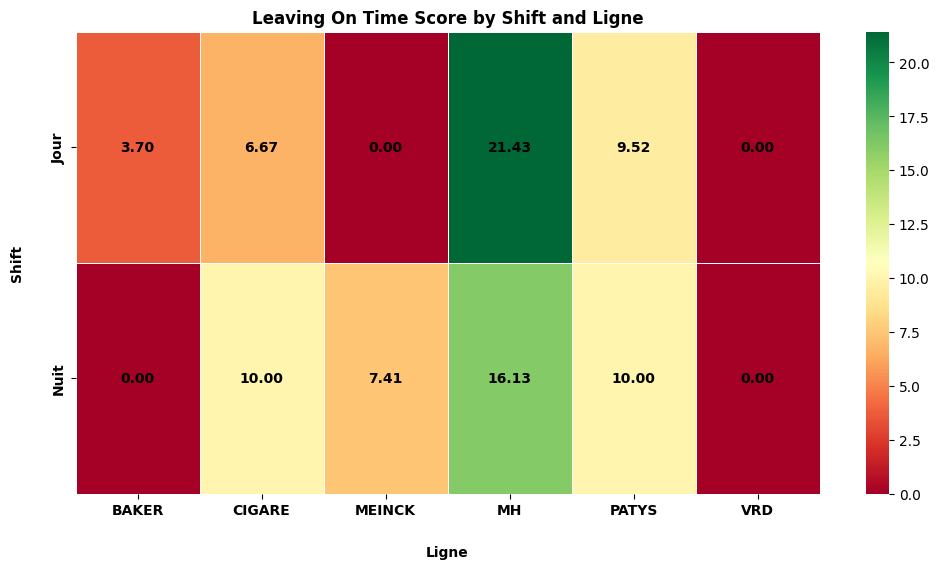

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the leaving on time data

# Calculate leaving on time score by shift and by 'Ligne'
leaving_score_by_shift_and_ligne = df.groupby(['Shift', 'Ligne'])['Leaving_On_Time'].mean() * 100

# Pivot the data for heatmap
leaving_score_pivot = leaving_score_by_shift_and_ligne.unstack('Ligne').fillna(0)

# Create the heatmap
plt.figure(figsize=(12, 6))
ax = sns.heatmap(leaving_score_pivot, annot=True, fmt=".2f", cmap='RdYlGn', linewidths=.5, annot_kws={'weight': 'bold', 'color': 'black'})

# Add labels and title with bold font
plt.title('Leaving On Time Score by Shift and Ligne', fontweight='bold')

# Set axis labels with increased label padding
ax.set_ylabel('Shift', fontweight='bold', labelpad=20)
ax.set_xlabel('Ligne', fontweight='bold', labelpad=20)

# Set the color and weight of the tick labels
ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold', color='black')
ax.set_yticklabels(ax.get_yticklabels(), fontweight='bold', color='black')

# Show the plot
plt.show()



# **PRODUCTIVITY SCORES**

In [8]:
# Load the dataset
file_path = '/content/drive/MyDrive/1HENRYS WORKFORCE/DF.xlsx'  # Update with your file path
df = pd.read_excel(file_path)

# Parsing function for 'hours:minutes' format
def parse_hours_minutes(time_str):
    if isinstance(time_str, str):
        hours, minutes = map(int, time_str.split(':'))
        return hours + minutes / 60
    else:
        return 0  # Return 0 for non-string or invalid entries

# Convert 'Actual Presence' to total hours
df['Actual Presence'] = df['Actual Presence'].apply(parse_hours_minutes)

# Group by 'Ligne' and 'Shift' and sum the 'Actual Presence'
total_hours_worked = df.groupby(['Ligne', 'Shift'])['Actual Presence'].sum()

# Count the number of records for each 'Ligne' and 'Shift' combination
entries_per_group = df.groupby(['Ligne', 'Shift']).size()

# Calculate expected total work hours (12 hours per shift per person)
expected_hours = entries_per_group * 12

# Calculate the productivity score as a percentage
productivity_score = (total_hours_worked / expected_hours) * 100

# Print the results
print("Total Hours Worked by Ligne and Shift:")
print(total_hours_worked)
print("\nExpected Total Work Hours by Ligne and Shift:")
print(expected_hours)
print("\nProductivity Score by Ligne and Shift (%):")
print(productivity_score)


Total Hours Worked by Ligne and Shift:
Ligne   Shift
BAKER   Jour     243.983333
        Nuit     232.650000
CIGARE  Jour     264.183333
        Nuit     112.783333
MEINCK  Jour     200.350000
        Nuit     298.733333
MH      Jour     223.783333
        Nuit     341.633333
PATYS   Jour     166.550000
        Nuit     208.050000
VRD     Jour     176.600000
        Nuit      83.000000
Name: Actual Presence, dtype: float64

Expected Total Work Hours by Ligne and Shift:
Ligne   Shift
BAKER   Jour     324
        Nuit     252
CIGARE  Jour     360
        Nuit     120
MEINCK  Jour     264
        Nuit     324
MH      Jour     336
        Nuit     372
PATYS   Jour     252
        Nuit     240
VRD     Jour     252
        Nuit      84
dtype: int64

Productivity Score by Ligne and Shift (%):
Ligne   Shift
BAKER   Jour     75.303498
        Nuit     92.321429
CIGARE  Jour     73.384259
        Nuit     93.986111
MEINCK  Jour     75.890152
        Nuit     92.201646
MH      Jour     66.602183


/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


# **Total Hours Paid and Not Worked**

In [9]:
import math

# Calculate the difference in hours for each group
hours_difference = expected_hours - total_hours_worked

# Sum up the differences to get the total aggregate difference
total_aggregate_difference = hours_difference.sum()

# Round up the total aggregate difference to the nearest integer
rounded_difference = math.ceil(total_aggregate_difference)

# Print the rounded total aggregate difference
print("Rounded Total Aggregate Difference in Hours:", rounded_difference)



Rounded Total Aggregate Difference in Hours: 628


**Summarize the Data in a Table**

In [10]:
# If you haven't already, install tabulate in Google Colab
!pip install tabulate

import pandas as pd
from tabulate import tabulate

# Round the productivity scores to two decimals
productivity_score_rounded = productivity_score.round(2)

# Combine the data into a single DataFrame
summary_df = pd.DataFrame({
    'Total Hours Worked': total_hours_worked,
    'Expected Total Work Hours': expected_hours,
    'Productivity Score (%)': productivity_score_rounded
}).reset_index()

# Format the DataFrame for better display
summary_df['Ligne'] = summary_df['Ligne'].astype(str)
summary_df['Shift'] = summary_df['Shift'].astype(str)
summary_df['Ligne and Shift'] = summary_df['Ligne'] + ' - ' + summary_df['Shift']
summary_df.drop(['Ligne', 'Shift'], axis=1, inplace=True)
summary_df = summary_df[['Ligne and Shift', 'Total Hours Worked', 'Expected Total Work Hours', 'Productivity Score (%)']]

# Print the summary table using tabulate with a plain format
print(tabulate(summary_df, headers='keys', tablefmt='fancy_grid', floatfmt=".2f", showindex=False))



╒═══════════════════╤══════════════════════╤═════════════════════════════╤══════════════════════════╕
│ Ligne and Shift   │   Total Hours Worked │   Expected Total Work Hours │   Productivity Score (%) │
╞═══════════════════╪══════════════════════╪═════════════════════════════╪══════════════════════════╡
│ BAKER - Jour      │               243.98 │                         324 │                    75.30 │
├───────────────────┼──────────────────────┼─────────────────────────────┼──────────────────────────┤
│ BAKER - Nuit      │               232.65 │                         252 │                    92.32 │
├───────────────────┼──────────────────────┼─────────────────────────────┼──────────────────────────┤
│ CIGARE - Jour     │               264.18 │                         360 │                    73.38 │
├───────────────────┼──────────────────────┼─────────────────────────────┼──────────────────────────┤
│ CIGARE - Nuit     │               112.78 │                         120 │        

**Bar Chart for Actual vs Expected Hours**

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


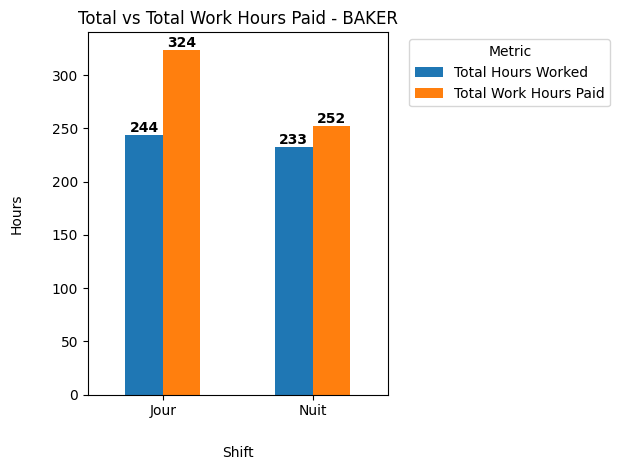

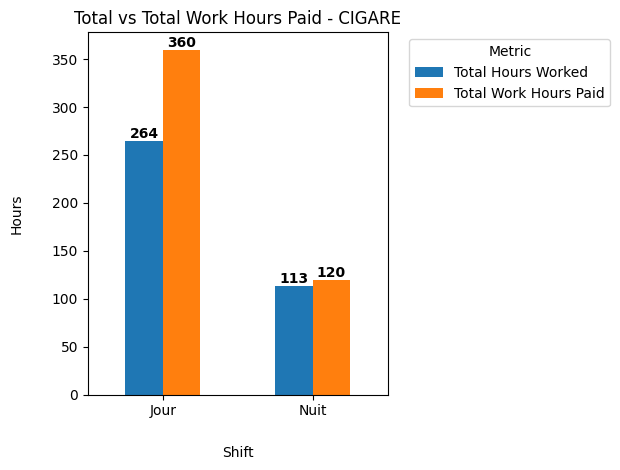

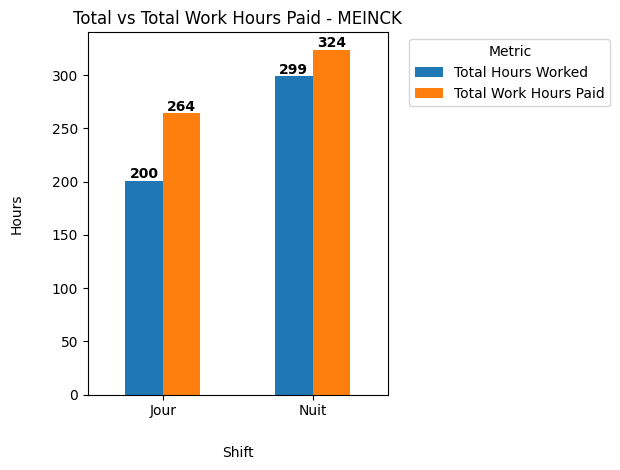

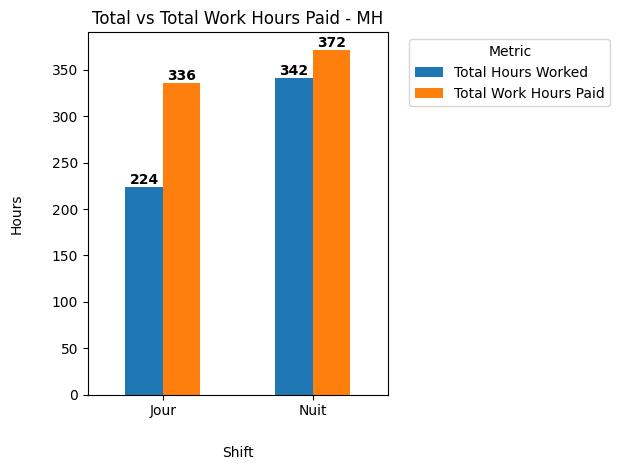

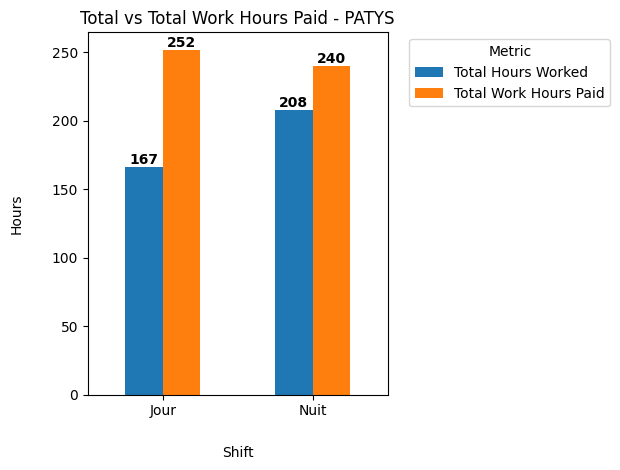

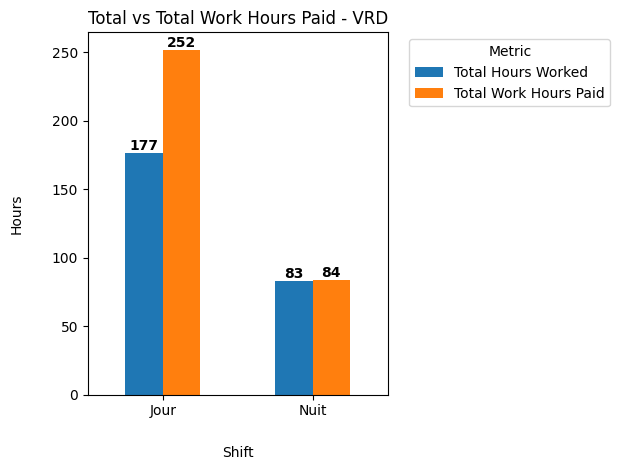

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to convert HH:MM to decimal hours
def convert_to_hours(time_str):
    if isinstance(time_str, str):
        hours, minutes = map(int, time_str.split(':'))
        return hours + minutes / 60
    return 0

# Load the dataset
file_path = '/content/drive/MyDrive/1HENRYS WORKFORCE/DF.xlsx'  # Update with your file path
df = pd.read_excel(file_path)


# Convert 'Actual Presence' to total hours
df['Actual Presence'] = df['Actual Presence'].apply(convert_to_hours)

# Aggregate 'Actual Presence' by 'Ligne' and 'Shift'
total_hours_worked = df.groupby(['Ligne', 'Shift'])['Actual Presence'].sum()

# Calculate the number of records for each 'Ligne' and 'Shift' combination
entries_per_group = df.groupby(['Ligne', 'Shift']).size()

# Calculate expected total work hours (12 hours per shift per person)
expected_hours = entries_per_group * 12

# Combine data for plotting
combined_data = pd.DataFrame({
    'Total Hours Worked': total_hours_worked,
    'Total Work Hours Paid': expected_hours  # Renamed label
}).reset_index()

# Plot separate bar charts for each 'Ligne'
unique_lignes = combined_data['Ligne'].unique()
for ligne in unique_lignes:
    subset = combined_data[combined_data['Ligne'] == ligne]
    ax = subset.plot(x='Shift', y=['Total Hours Worked', 'Total Work Hours Paid'], kind='bar', title=f'Total vs Total Work Hours Paid - {ligne}', legend=False)
    ax.set_ylabel('Hours', labelpad=20)
    ax.set_xlabel('Shift', labelpad=20)
    plt.xticks(rotation=0)

    # Add black and bold number labels above the bars
    for p in ax.patches:
        ax.annotate(f"{round(p.get_height()):d}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', color='black', fontweight='bold', xytext=(0, 5), textcoords='offset points')

    # Move the legend to the right of the graph
    plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


**Heat Map Productivity Scores**

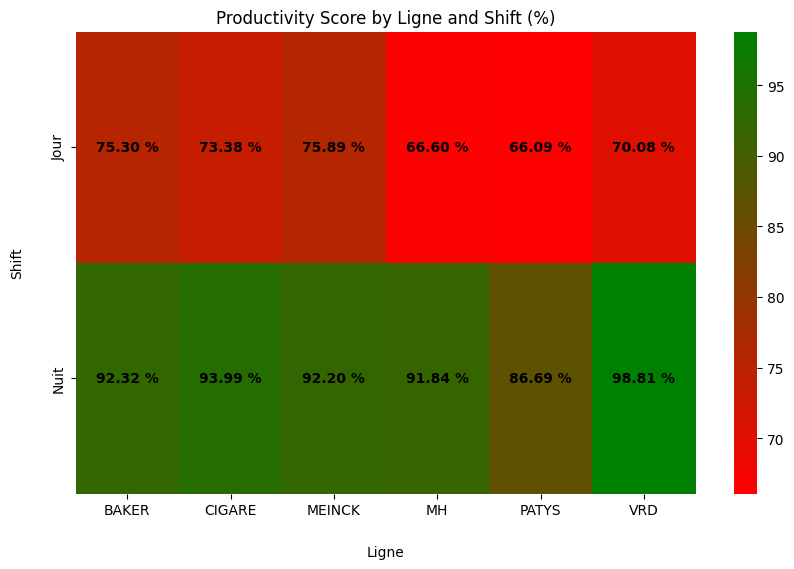

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Assuming productivity_score is already calculated and available
# Pivot the productivity score for the heatmap
productivity_pivot = productivity_score.unstack('Ligne')

# Define a custom colormap from red to green
cmap = mcolors.LinearSegmentedColormap.from_list("", ["red", "green"])

# Create the heatmap
plt.figure(figsize=(10, 6))
ax = sns.heatmap(productivity_pivot, annot=True, fmt=".2f", cmap=cmap)
plt.title('Productivity Score by Ligne and Shift (%)')

# Adjust axis labels and their padding
ax.set_ylabel('Shift', labelpad=20)
ax.set_xlabel('Ligne', labelpad=20)

# Optionally, adjust annotations for better visibility
for t in ax.texts:
    t.set_text(t.get_text() + " %")
    t.set_weight('bold')
    t.set_color('black')

plt.show()
